# Vendor Qualification System - Data Exploration

This notebook is for exploring and analyzing the vendor dataset.

## Dataset Overview
The dataset contains CRM software vendors with the following key attributes:
- **Product Information**: Name, rating, description, URL
- **Vendor Details**: Company info, headquarters, revenue, social media
- **Categories**: Main category (e.g., "CRM Software") 
- **Features**: Detailed feature descriptions and capabilities
- **Ratings & Reviews**: User ratings, review counts, pros/cons
- **Pricing**: Package information and pricing details


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)


## 1. Load and Explore Data


In [2]:
# Load the CSV file
df = pd.read_csv('../data/G2 software - CRM Category Product Overviews.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumns:")
for i, col in enumerate(df.columns.tolist(), 1):
    print(f"{i:2d}. {col}")

print(f"\nTotal number of vendors: {len(df)}")
print(f"Total number of features: {len(df.columns)}")

# Check for missing values
print(f"\nMissing values per column:")
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
}).sort_values('Missing %', ascending=False)

print(missing_df)


Dataset Shape: (63, 45)

Columns:
 1. url
 2. product_name
 3. rating
 4. description
 5. product_url
 6. seller
 7. ownership
 8. seller_website
 9. headquarters
10. total_revenue
11. social_media_profiles
12. seller_description
13. reviews_count
14. discussions_count
15. pros_list
16. cons_list
17. competitors
18. highest_rated_features
19. lowest_rated_features
20. rating_split
21. pricing
22. official_screenshots
23. official_downloads
24. official_videos
25. categories
26. user_ratings
27. languages_supported
28. year_founded
29. position_against_competitors
30. overview
31. claimed
32. logo
33. reviews
34. top_alternatives
35. top_alternatives_url
36. full_pricing_page
37. badge
38. what_is_description
39. main_category
40. main_subject
41. Features
42. region
43. country_code
44. software_product_id
45. overview_provided_by

Total number of vendors: 63
Total number of features: 45

Missing values per column:
                              Missing Count   Missing %
official_videos

<Axes: >

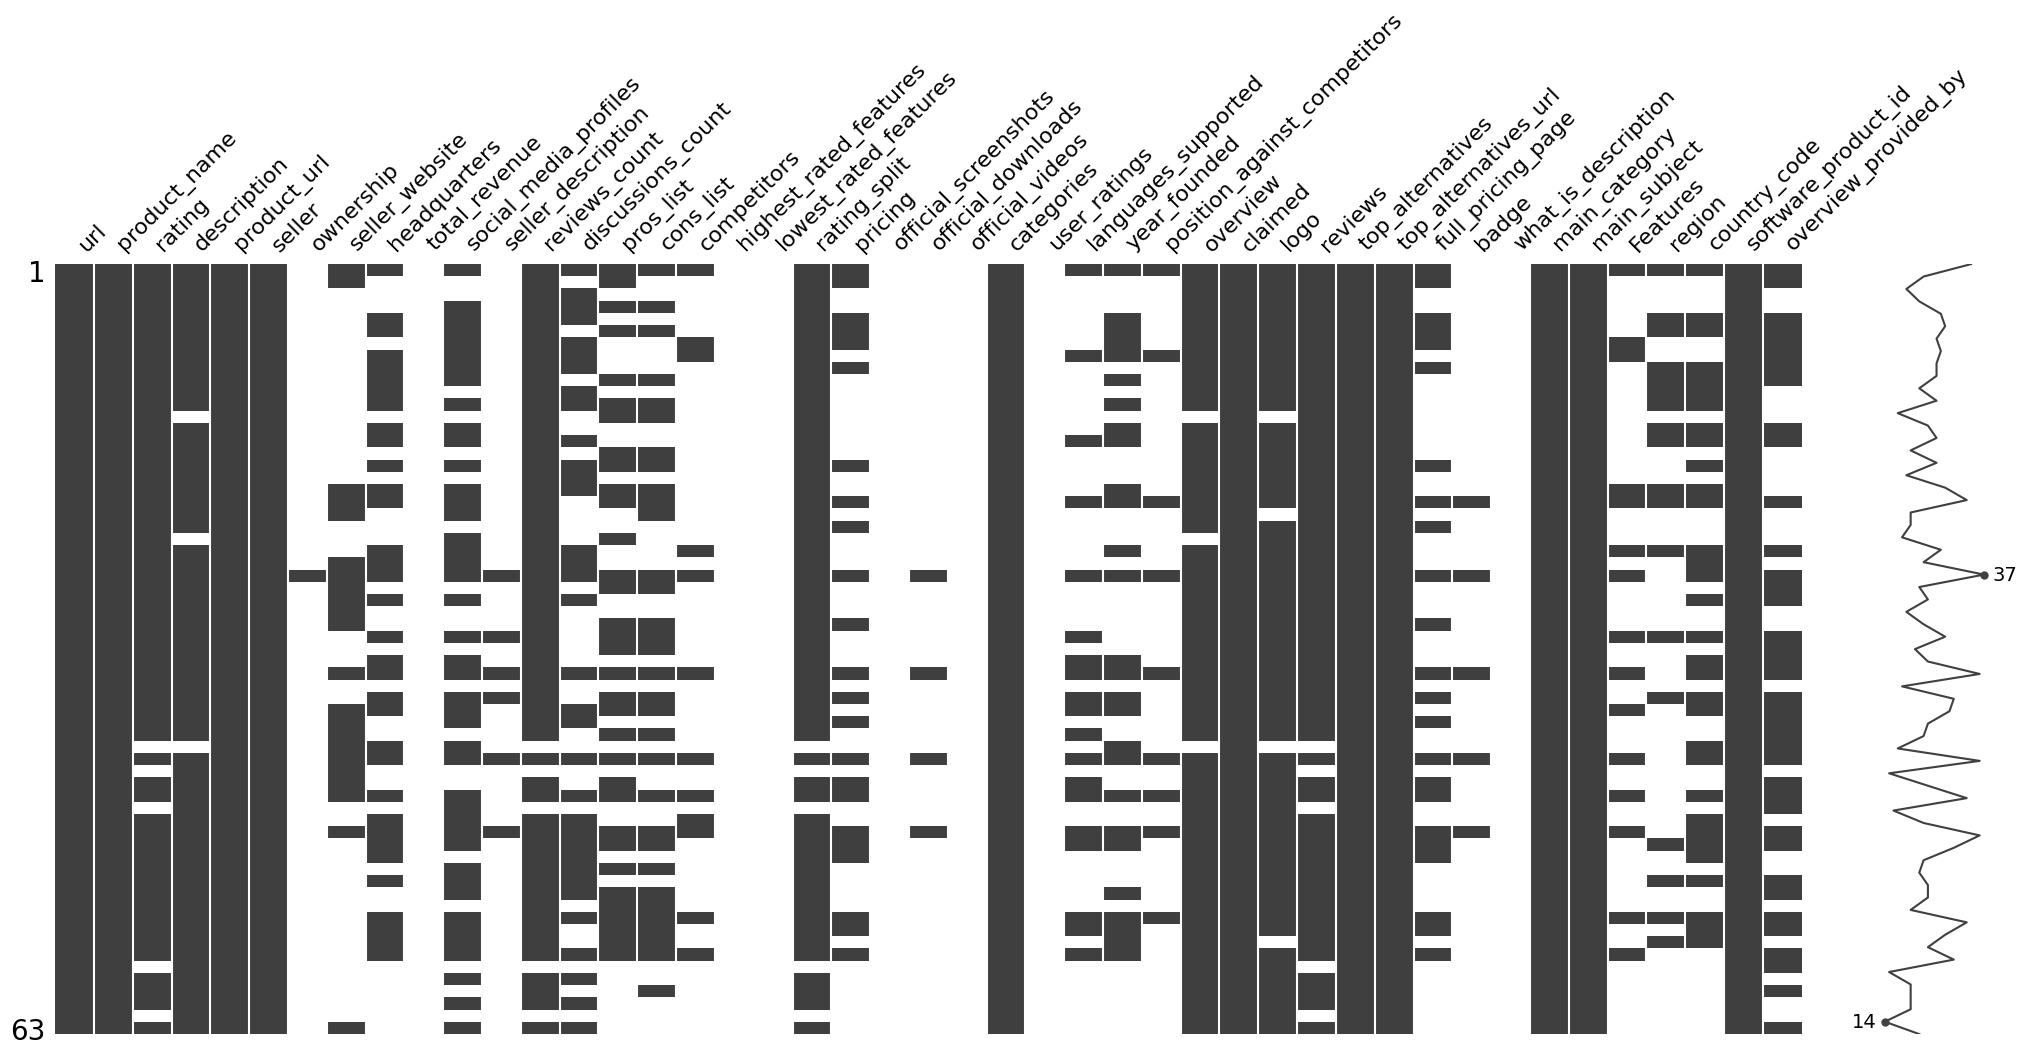

In [3]:
msno.matrix(df)

In [4]:
df = df.drop(columns=['ownership', 'total_revenue', 'highest_rated_features', 'lowest_rated_features', 'official_screenshots', 'official_videos', 'user_ratings', 'badge', 'what_is_description', 'seller_description', 'position_against_competitors', 'competitors', 'official_downloads'])

<Axes: >

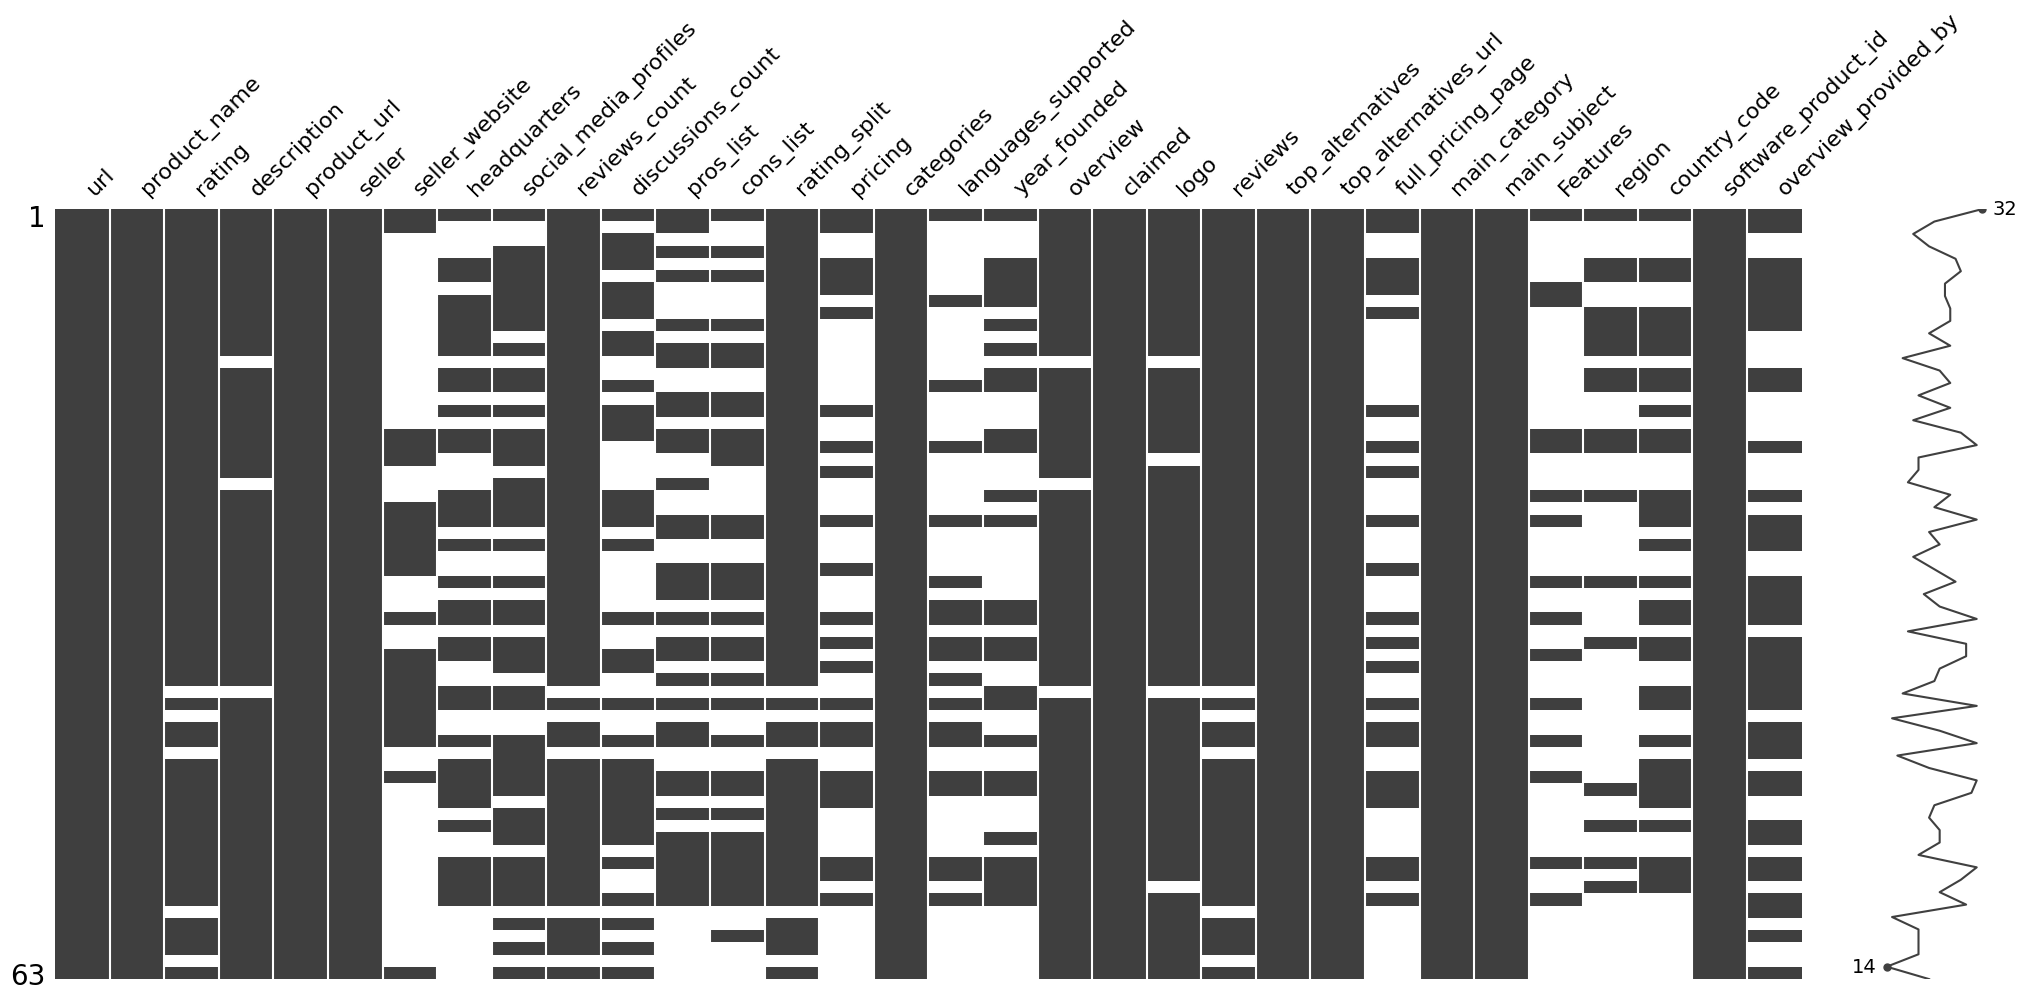

In [5]:
msno.matrix(df)

In [6]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumns:")
for i, col in enumerate(df.columns.tolist(), 1):
    print(f"{i:2d}. {col}")

print(f"\nTotal number of vendors: {len(df)}")
print(f"Total number of features: {len(df.columns)}")

# Check for missing values
print(f"\nMissing values per column:")
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent
}).sort_values('Missing %', ascending=False)

print(missing_df)

Dataset Shape: (63, 32)

Columns:
 1. url
 2. product_name
 3. rating
 4. description
 5. product_url
 6. seller
 7. seller_website
 8. headquarters
 9. social_media_profiles
10. reviews_count
11. discussions_count
12. pros_list
13. cons_list
14. rating_split
15. pricing
16. categories
17. languages_supported
18. year_founded
19. overview
20. claimed
21. logo
22. reviews
23. top_alternatives
24. top_alternatives_url
25. full_pricing_page
26. main_category
27. main_subject
28. Features
29. region
30. country_code
31. software_product_id
32. overview_provided_by

Total number of vendors: 63
Total number of features: 32

Missing values per column:
                       Missing Count  Missing %
Features                          48  76.190476
region                            45  71.428571
languages_supported               44  69.841270
seller_website                    41  65.079365
full_pricing_page                 40  63.492063
pricing                           40  63.492063
year_founde

In [7]:
data = []
for row in df['Features']:
    if pd.notna(row) and row is not None:
        print(row)
        data.append(json.loads(row))

[{"Category":"Platform","features":[{"description":"Based on 50 Efficy CRM reviews and verified by the G2 Product R&D team. Allows administrators to customize to accomodate their unique processes.  Includes ability to create custom objects, fields, rules, calculations, and views.","name":"Customization","percent":87,"review":50},{"description":"Based on 50 Efficy CRM reviews and verified by the G2 Product R&D team. Automates a process that requires a series of steps that typically require intervention by a several different users.  Administrators can write rules to determine who and when a user needs to complete a step.  Also includes notification of users when they need to take action.","name":"Workflow Capability","percent":89,"review":50},{"description":"Based on 52 Efficy CRM reviews and verified by the G2 Product R&D team. Grant access to select data, features, objects, etc. based on the users, user role, groups, etc.","name":"User, Role, and Access Management","percent":88,"revie

In [8]:
data

[[{'Category': 'Platform',
   'features': [{'description': 'Based on 50 Efficy CRM reviews and verified by the G2 Product R&D team. Allows administrators to customize to accomodate their unique processes.  Includes ability to create custom objects, fields, rules, calculations, and views.',
     'name': 'Customization',
     'percent': 87,
     'review': 50},
    {'description': 'Based on 50 Efficy CRM reviews and verified by the G2 Product R&D team. Automates a process that requires a series of steps that typically require intervention by a several different users.  Administrators can write rules to determine who and when a user needs to complete a step.  Also includes notification of users when they need to take action.',
     'name': 'Workflow Capability',
     'percent': 89,
     'review': 50},
    {'description': 'Based on 52 Efficy CRM reviews and verified by the G2 Product R&D team. Grant access to select data, features, objects, etc. based on the users, user role, groups, etc.',

In [9]:
df['Features'].map(type).value_counts()

Features
<class 'float'>    48
<class 'str'>      15
Name: count, dtype: int64

In [10]:
print(df.columns)

Index(['url', 'product_name', 'rating', 'description', 'product_url', 'seller',
       'seller_website', 'headquarters', 'social_media_profiles',
       'reviews_count', 'discussions_count', 'pros_list', 'cons_list',
       'rating_split', 'pricing', 'categories', 'languages_supported',
       'year_founded', 'overview', 'claimed', 'logo', 'reviews',
       'top_alternatives', 'top_alternatives_url', 'full_pricing_page',
       'main_category', 'main_subject', 'Features', 'region', 'country_code',
       'software_product_id', 'overview_provided_by'],
      dtype='object')


## 2. Features Analysis

The "Features" column appears to contain JSON data with detailed feature information. Let's explore this:


In [11]:
# Examine the Features column
print("Features Column Analysis:")
print("="*50)

# Check if Features column exists and has data
if 'Features' in df.columns:
    features_sample = df['Features'].dropna().iloc[0] if df['Features'].dropna().shape[0] > 0 else None
    
    if features_sample:
        print("Sample Features data (first 500 characters):")
        print(features_sample[:500])
        print("\n" + "="*50)
        
        # Try to parse JSON
        try:
            features_json = json.loads(features_sample)
            print(f"Features is valid JSON with {len(features_json)} categories")
            print("\nFeature categories:")
            for category in features_json:
                print(f"- {category['Category']}: {len(category['features'])} features")
        except json.JSONDecodeError:
            print("Features column is not in JSON format")
    else:
        print("No valid features data found")
else:
    print("Features column not found in dataset")


Features Column Analysis:
Sample Features data (first 500 characters):
[{"Category":"Platform","features":[{"description":"Based on 50 Efficy CRM reviews and verified by the G2 Product R&D team. Allows administrators to customize to accomodate their unique processes.  Includes ability to create custom objects, fields, rules, calculations, and views.","name":"Customization","percent":87,"review":50},{"description":"Based on 50 Efficy CRM reviews and verified by the G2 Product R&D team. Automates a process that requires a series of steps that typically require interv

Features is valid JSON with 9 categories

Feature categories:
- Platform: 11 features
- Sales Force Automation: 9 features
- Marketing Automation: 4 features
- Customer Support: 5 features
- Integration: 9 features
- Mobile & Social: 3 features
- Reporting & Analytics: 5 features
- Email Marketing: 9 features
- Generative AI: 1 features


In [12]:
# Function to extract all feature names from the Features column
def extract_feature_names(features_json_str):
    """Extract all feature names from a JSON features string"""
    if pd.isna(features_json_str):
        return []
    
    try:
        features_data = json.loads(features_json_str)
        feature_names = []
        
        for category in features_data:
            for feature in category.get('features', []):
                feature_names.append(feature.get('name', ''))
        
        return feature_names
    except (json.JSONDecodeError, TypeError):
        return []

# Extract features for all vendors
all_features = []
feature_counts = Counter()

print("Extracting features from all vendors...")
for idx, features_str in enumerate(df['Features'].dropna()):
    vendor_features = extract_feature_names(features_str)
    all_features.extend(vendor_features)
    feature_counts.update(vendor_features)
    
    if idx < 3:  # Show first 3 vendors' features
        vendor_name = df.iloc[idx]['product_name']
        print(f"\n{vendor_name}: {len(vendor_features)} features")
        print(f"Sample features: {vendor_features[:5]}")

print(f"\nTotal unique features found: {len(feature_counts)}")
print(f"Total feature mentions: {sum(feature_counts.values())}")

# Show most common features
print(f"\nTop 15 most common features:")
for feature, count in feature_counts.most_common(15):
    print(f"- {feature}: {count} vendors")


Extracting features from all vendors...

Efficy CRM: 56 features
Sample features: ['Customization', 'Workflow Capability', 'User, Role, and Access Management', 'Internationalization', 'Sandbox / Test Environments']

Salesboss: 35 features
Sample features: ['Customization', 'Workflow Capability', 'User, Role, and Access Management', 'Internationalization', 'Sandbox / Test Environments']

Desktop Sales Office: 32 features
Sample features: ['Customization', 'Workflow Capability', 'User, Role, and Access Management', 'Internationalization', 'Sandbox / Test Environments']

Total unique features found: 244
Total feature mentions: 935

Top 15 most common features:
- User, Role, and Access Management: 20 vendors
- Performance and Reliability: 20 vendors
- Data Import & Export Tools: 20 vendors
- Integration APIs: 20 vendors
- Internationalization: 19 vendors
- Breadth of Partner Applications: 19 vendors
- Lead Management: 17 vendors
- Reporting: 17 vendors
- Dashboards: 17 vendors
- Customizat

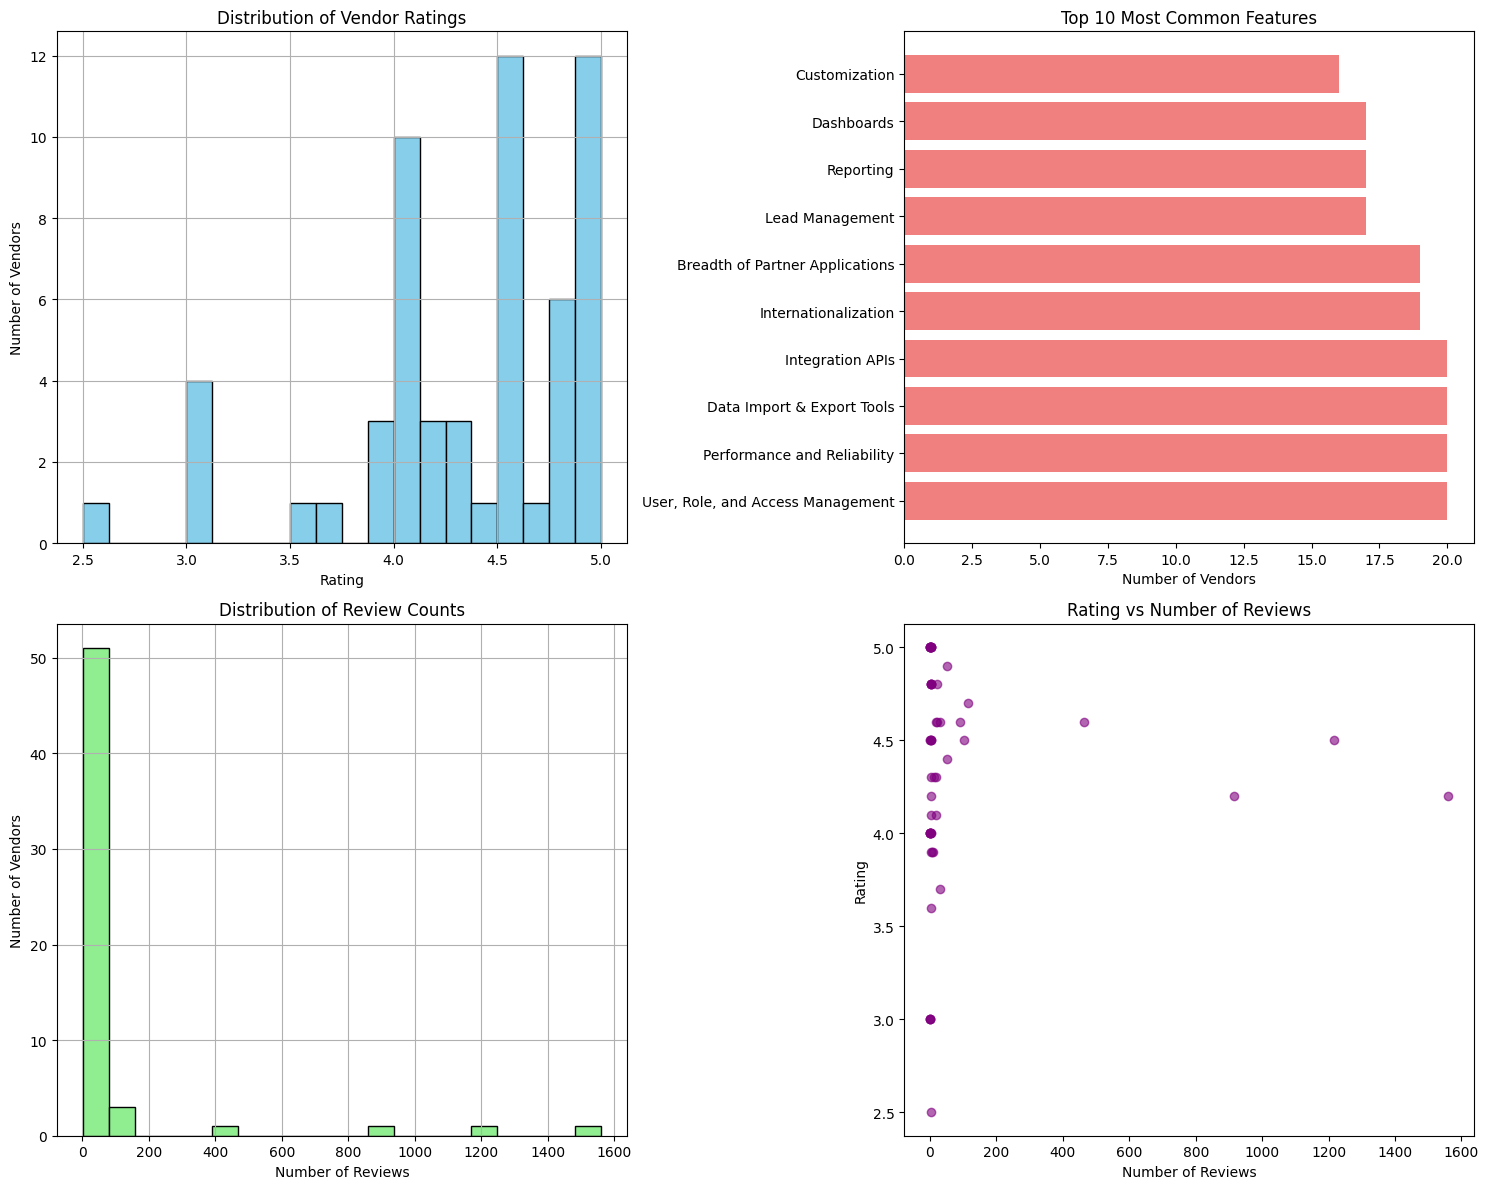

In [13]:
# Visualize key metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Rating distribution
df['rating'].hist(bins=20, ax=axes[0,0], color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of Vendor Ratings')
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Number of Vendors')

# 2. Top 10 most common features
top_features = feature_counts.most_common(10)
features, counts = zip(*top_features)
axes[0,1].barh(range(len(features)), counts, color='lightcoral')
axes[0,1].set_yticks(range(len(features)))
axes[0,1].set_yticklabels(features)
axes[0,1].set_title('Top 10 Most Common Features')
axes[0,1].set_xlabel('Number of Vendors')

# 3. Reviews count distribution (if available)
if 'reviews_count' in df.columns:
    df['reviews_count'].hist(bins=20, ax=axes[1,0], color='lightgreen', edgecolor='black')
    axes[1,0].set_title('Distribution of Review Counts')
    axes[1,0].set_xlabel('Number of Reviews')
    axes[1,0].set_ylabel('Number of Vendors')
else:
    axes[1,0].text(0.5, 0.5, 'Reviews count\nnot available', 
                   ha='center', va='center', transform=axes[1,0].transAxes)
    axes[1,0].set_title('Review Counts (Not Available)')

# 4. Rating vs Reviews relationship
if 'reviews_count' in df.columns:
    axes[1,1].scatter(df['reviews_count'], df['rating'], alpha=0.6, color='purple')
    axes[1,1].set_xlabel('Number of Reviews')
    axes[1,1].set_ylabel('Rating')
    axes[1,1].set_title('Rating vs Number of Reviews')
else:
    axes[1,1].text(0.5, 0.5, 'Cannot plot\nwithout review counts', 
                   ha='center', va='center', transform=axes[1,1].transAxes)
    axes[1,1].set_title('Rating vs Reviews (Not Available)')

plt.tight_layout()
plt.show()


## 4. Similarity Analysis Exploration

Let's explore different approaches for feature similarity scoring:


In [14]:
# Test similarity approaches
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Example query - looking for "Budgeting" capabilities
test_query = ["Budgeting"]
print(f"Test query: {test_query}")

# Find features that might match "Budgeting"
budgeting_matches = [feature for feature in feature_counts.keys() 
                    if 'budget' in feature.lower()]
print(f"\nFeatures containing 'budget': {budgeting_matches}")

# Create sample vendor feature lists for testing
sample_vendors = []
sample_names = []

for idx in range(min(5, len(df))):
    if pd.notna(df.iloc[idx]['Features']):
        vendor_features = extract_feature_names(df.iloc[idx]['Features'])
        if vendor_features:  # Only add if vendor has features
            sample_vendors.append(' '.join(vendor_features))
            sample_names.append(df.iloc[idx]['product_name'])

print(f"\nSample vendors for similarity testing: {len(sample_vendors)}")
for i, name in enumerate(sample_names):
    print(f"{i+1}. {name}")

# Test TF-IDF similarity
if sample_vendors:
    # Combine query with vendor features for TF-IDF
    documents = [' '.join(test_query)] + sample_vendors
    
    # Create TF-IDF vectors
    vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(documents)
    
    # Compute similarities between query (first document) and vendors
    query_vec = tfidf_matrix[0:1]
    vendor_vecs = tfidf_matrix[1:]
    similarities = cosine_similarity(query_vec, vendor_vecs)[0]
    
    print(f"\nSimilarity scores for query '{test_query[0]}':")
    print("-" * 50)
    for i, (name, score) in enumerate(zip(sample_names, similarities)):
        print(f"{name:25} | Score: {score:.4f}")
    
    # Show threshold analysis
    thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
    print(f"\nThreshold analysis:")
    print("-" * 30)
    for threshold in thresholds:
        matches = sum(1 for score in similarities if score >= threshold)
        print(f"Threshold {threshold:.1f}: {matches}/{len(similarities)} vendors match")


Test query: ['Budgeting']

Features containing 'budget': ['Budgeting']

Sample vendors for similarity testing: 1
1. Efficy CRM

Similarity scores for query 'Budgeting':
--------------------------------------------------
Efficy CRM                | Score: 0.0000

Threshold analysis:
------------------------------
Threshold 0.1: 0/1 vendors match
Threshold 0.2: 0/1 vendors match
Threshold 0.3: 0/1 vendors match
Threshold 0.4: 0/1 vendors match
Threshold 0.5: 0/1 vendors match
Threshold 0.6: 0/1 vendors match


In [15]:
import json
# if your cell looks like '[{"Category":"Platform", ...}, {...}, …]'
df['Features'] = df['Features'].apply(lambda x: json.loads(x) 
                                      if isinstance(x, str) else x)

In [16]:
df_exploded = df.explode('Features').reset_index(drop=True)

print(df_exploded.head())
print(df_exploded.shape)

                                              url product_name  rating  \
0  https://www.g2.com/products/efficy-crm/reviews   Efficy CRM     4.5   
1  https://www.g2.com/products/efficy-crm/reviews   Efficy CRM     4.5   
2  https://www.g2.com/products/efficy-crm/reviews   Efficy CRM     4.5   
3  https://www.g2.com/products/efficy-crm/reviews   Efficy CRM     4.5   
4  https://www.g2.com/products/efficy-crm/reviews   Efficy CRM     4.5   

                                         description  \
0  The Efficy extendable CRM platform (xCRM) orga...   
1  The Efficy extendable CRM platform (xCRM) orga...   
2  The Efficy extendable CRM platform (xCRM) orga...   
3  The Efficy extendable CRM platform (xCRM) orga...   
4  The Efficy extendable CRM platform (xCRM) orga...   

                                   product_url  seller  \
0  https://www.efficy.com/efficy-crm-features/  Efficy   
1  https://www.efficy.com/efficy-crm-features/  Efficy   
2  https://www.efficy.com/efficy-crm-feature

In [17]:
df_exploded['Features_Category'] = df_exploded['Features'].apply(lambda x: x['Category'] if isinstance(x, dict) else x)
df_exploded['Features_list'] = df_exploded['Features'].apply(lambda x: x['features'] if isinstance(x, dict) else x)

df_exploded = df_exploded.drop(columns=['Features'])

print(df_exploded.head())
print(df_exploded.shape)

                                              url product_name  rating  \
0  https://www.g2.com/products/efficy-crm/reviews   Efficy CRM     4.5   
1  https://www.g2.com/products/efficy-crm/reviews   Efficy CRM     4.5   
2  https://www.g2.com/products/efficy-crm/reviews   Efficy CRM     4.5   
3  https://www.g2.com/products/efficy-crm/reviews   Efficy CRM     4.5   
4  https://www.g2.com/products/efficy-crm/reviews   Efficy CRM     4.5   

                                         description  \
0  The Efficy extendable CRM platform (xCRM) orga...   
1  The Efficy extendable CRM platform (xCRM) orga...   
2  The Efficy extendable CRM platform (xCRM) orga...   
3  The Efficy extendable CRM platform (xCRM) orga...   
4  The Efficy extendable CRM platform (xCRM) orga...   

                                   product_url  seller  \
0  https://www.efficy.com/efficy-crm-features/  Efficy   
1  https://www.efficy.com/efficy-crm-features/  Efficy   
2  https://www.efficy.com/efficy-crm-feature

In [18]:
df_exploded2 = df_exploded.explode('Features_list').reset_index(drop=True)

print(df_exploded2.head())
print(df_exploded2.shape)

                                              url product_name  rating  \
0  https://www.g2.com/products/efficy-crm/reviews   Efficy CRM     4.5   
1  https://www.g2.com/products/efficy-crm/reviews   Efficy CRM     4.5   
2  https://www.g2.com/products/efficy-crm/reviews   Efficy CRM     4.5   
3  https://www.g2.com/products/efficy-crm/reviews   Efficy CRM     4.5   
4  https://www.g2.com/products/efficy-crm/reviews   Efficy CRM     4.5   

                                         description  \
0  The Efficy extendable CRM platform (xCRM) orga...   
1  The Efficy extendable CRM platform (xCRM) orga...   
2  The Efficy extendable CRM platform (xCRM) orga...   
3  The Efficy extendable CRM platform (xCRM) orga...   
4  The Efficy extendable CRM platform (xCRM) orga...   

                                   product_url  seller  \
0  https://www.efficy.com/efficy-crm-features/  Efficy   
1  https://www.efficy.com/efficy-crm-features/  Efficy   
2  https://www.efficy.com/efficy-crm-feature

In [19]:
df_exploded2['Features_list'].map(type).value_counts()

Features_list
<class 'dict'>     935
<class 'float'>     48
Name: count, dtype: int64

In [20]:
# Add error handling for when dict keys don't exist
df_exploded2['Feature_description'] = df_exploded2['Features_list'].apply(lambda x: x.get('description', x) if isinstance(x, dict) else x)
df_exploded2['Feature_name'] = df_exploded2['Features_list'].apply(lambda x: x.get('name', x) if isinstance(x, dict) else x) 
df_exploded2['Feature_percent'] = df_exploded2['Features_list'].apply(lambda x: x.get('percent', x) if isinstance(x, dict) else x)
df_exploded2['Feature_review'] = df_exploded2['Features_list'].apply(lambda x: x.get('review', x) if isinstance(x, dict) else x)

df_exploded2 = df_exploded2.drop(columns=['Features_list'])

print(df_exploded2.head())
print(df_exploded2.shape)

                                              url product_name  rating  \
0  https://www.g2.com/products/efficy-crm/reviews   Efficy CRM     4.5   
1  https://www.g2.com/products/efficy-crm/reviews   Efficy CRM     4.5   
2  https://www.g2.com/products/efficy-crm/reviews   Efficy CRM     4.5   
3  https://www.g2.com/products/efficy-crm/reviews   Efficy CRM     4.5   
4  https://www.g2.com/products/efficy-crm/reviews   Efficy CRM     4.5   

                                         description  \
0  The Efficy extendable CRM platform (xCRM) orga...   
1  The Efficy extendable CRM platform (xCRM) orga...   
2  The Efficy extendable CRM platform (xCRM) orga...   
3  The Efficy extendable CRM platform (xCRM) orga...   
4  The Efficy extendable CRM platform (xCRM) orga...   

                                   product_url  seller  \
0  https://www.efficy.com/efficy-crm-features/  Efficy   
1  https://www.efficy.com/efficy-crm-features/  Efficy   
2  https://www.efficy.com/efficy-crm-feature

In [21]:
df_exploded2

,url,product_name,rating,description,product_url,seller,seller_website,headquarters,social_media_profiles,reviews_count,...,main_subject,region,country_code,software_product_id,overview_provided_by,Features_Category,Feature_description,Feature_name,Feature_percent,Feature_review
0,https://www.g2.com/products/efficy-crm/reviews,Efficy CRM,4.5,The Efficy extendable CRM platform (xCRM) orga...,https://www.efficy.com/efficy-crm-features/,Efficy,https://www.efficy.com/,"Brussels, Belgium","[{""properties"":[{""name"":""followers"",""value"":""1...",102.0,...,Home>CRM Software>Efficy CRM>Efficy CRM Reviews,EU,BE,efficy-crm,Laetitia Baret,Platform,Based on 50 Efficy CRM reviews and verified by...,Customization,87.0,50.0
1,https://www.g2.com/products/efficy-crm/reviews,Efficy CRM,4.5,The Efficy extendable CRM platform (xCRM) orga...,https://www.efficy.com/efficy-crm-features/,Efficy,https://www.efficy.com/,"Brussels, Belgium","[{""properties"":[{""name"":""followers"",""value"":""1...",102.0,...,Home>CRM Software>Efficy CRM>Efficy CRM Reviews,EU,BE,efficy-crm,Laetitia Baret,Platform,Based on 50 Efficy CRM reviews and verified by...,Workflow Capability,89.0,50.0
2,https://www.g2.com/products/efficy-crm/reviews,Efficy CRM,4.5,The Efficy extendable CRM platform (xCRM) orga...,https://www.efficy.com/efficy-crm-features/,Efficy,https://www.efficy.com/,"Brussels, Belgium","[{""properties"":[{""name"":""followers"",""value"":""1...",102.0,...,Home>CRM Software>Efficy CRM>Efficy CRM Reviews,EU,BE,efficy-crm,Laetitia Baret,Platform,Based on 52 Efficy CRM reviews and verified by...,"User, Role, and Access Management",88.0,52.0
3,https://www.g2.com/products/efficy-crm/reviews,Efficy CRM,4.5,The Efficy extendable CRM platform (xCRM) orga...,https://www.efficy.com/efficy-crm-features/,Efficy,https://www.efficy.com/,"Brussels, Belgium","[{""properties"":[{""name"":""followers"",""value"":""1...",102.0,...,Home>CRM Software>Efficy CRM>Efficy CRM Reviews,EU,BE,efficy-crm,Laetitia Baret,Platform,Based on 47 Efficy CRM reviews and verified by...,Internationalization,89.0,47.0
4,https://www.g2.com/products/efficy-crm/reviews,Efficy CRM,4.5,The Efficy extendable CRM platform (xCRM) orga...,https://www.efficy.com/efficy-crm-features/,Efficy,https://www.efficy.com/,"Brussels, Belgium","[{""properties"":[{""name"":""followers"",""value"":""1...",102.0,...,Home>CRM Software>Efficy CRM>Efficy CRM Reviews,EU,BE,efficy-crm,Laetitia Baret,Platform,Based on 49 Efficy CRM reviews and verified by...,Sandbox / Test Environments,86.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,https://www.g2.com/products/smalution-crm/reviews,Smalution CRM,3.0,Our Smalution CRM can be customized as per ind...,https://www.g2.com/products/smalution-crm/reviews,Smalution,NaN,NaN,"[{""properties"":[{""name"":""followers"",""value"":""1...",1.0,...,Home>CRM Software>Smalution CRM>Smalution CRM ...,NaN,NaN,smalution-crm,NaN,NaN,NaN,NaN,NaN,NaN
979,https://www.g2.com/products/insale-crm/reviews,Insale CRM,5.0,"Simple, smart & easy Sales CRM for your team. ...",https://www.g2.com/products/insale-crm/reviews,Zaw,NaN,NaN,NaN,1.0,...,Home>CRM Software>Insale CRM>Insale CRM Reviews,NaN,NaN,insale-crm,Zaw Min Tin,NaN,NaN,NaN,NaN,NaN
980,https://www.g2.com/products/exert-crm/reviews,eXert CRM,4.0,eXert CRM software is designed on the basis of...,https://www.g2.com/products/exert-crm/reviews,eXerterp,NaN,NaN,"[{""properties"":[{""name"":""followers"",""value"":""6...",2.0,...,Home>CRM Software>eXert CRM>eXert CRM Reviews,NaN,NaN,exert-crm,NaN,NaN,NaN,NaN,NaN,NaN
981,https://www.g2.com/products/directions-crm/rev...,Directions CRM,NaN,"""Discover the power of Directions CRM! We offe...",https://www.g2.com/products/directions-crm/rev...,Directions CRM,NaN,NaN,NaN,NaN,...,Home>CRM Software>Directions CRM>Directions CR...,NaN,NaN,directions-crm,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
sample_df = df_exploded2[['categories', 'Features_Category', 'Feature_name']]
sample_df

,categories,Features_Category,Feature_name
0,"[""CRM"",""Email Marketing""]",Platform,Customization
1,"[""CRM"",""Email Marketing""]",Platform,Workflow Capability
2,"[""CRM"",""Email Marketing""]",Platform,"User, Role, and Access Management"
3,"[""CRM"",""Email Marketing""]",Platform,Internationalization
4,"[""CRM"",""Email Marketing""]",Platform,Sandbox / Test Environments
...,...,...,...
978,"[""CRM""]",NaN,NaN
979,"[""CRM""]",NaN,NaN
980,"[""CRM""]",NaN,NaN
981,"[""CRM""]",NaN,NaN


In [23]:
# Display sample data
print("Sample Data:")
print("="*50)
df.head(3)


Sample Data:


,url,product_name,rating,description,product_url,seller,seller_website,headquarters,social_media_profiles,reviews_count,...,top_alternatives,top_alternatives_url,full_pricing_page,main_category,main_subject,Features,region,country_code,software_product_id,overview_provided_by
0,https://www.g2.com/products/efficy-crm/reviews,Efficy CRM,4.5,The Efficy extendable CRM platform (xCRM) orga...,https://www.efficy.com/efficy-crm-features/,Efficy,https://www.efficy.com/,"Brussels, Belgium","[{""properties"":[{""name"":""followers"",""value"":""1...",102.0,...,"[{""link"":""https://www.g2.comundefined""},{""link...",https://www.g2.com/products/efficy-crm/competi...,https://www.g2.com/products/efficy-crm/pricing,CRM Software,Home>CRM Software>Efficy CRM>Efficy CRM Reviews,"[{'Category': 'Platform', 'features': [{'descr...",EU,BE,efficy-crm,Laetitia Baret
1,https://www.g2.com/products/salesboss/reviews,Salesboss,5.0,"SalesBoss is an all-in-one sales, marketing, c...",https://www.salesboss.ai/pricing,Salesboss,https://www.salesboss.ai/,NaN,NaN,1.0,...,"[{""link"":""https://www.g2.com/products/salesfor...",https://www.g2.com/products/salesboss/competit...,https://www.g2.com/products/salesboss/pricing,CRM Software,Home>CRM Software>Salesboss>Salesboss Reviews,NaN,NaN,NaN,salesboss,Prit Pal
2,https://www.g2.com/products/desktop-sales-offi...,Desktop Sales Office,3.0,Desktop Sales Office 2007 is a collection of i...,https://www.g2.com/products/desktop-sales-offi...,The CRM Guide,NaN,NaN,NaN,1.0,...,"[{""link"":""https://www.g2.comundefined""},{""link...",https://www.g2.com/products/desktop-sales-offi...,NaN,CRM Software,Home>CRM Software>Desktop Sales Office>Desktop...,NaN,NaN,NaN,desktop-sales-office,NaN


In [24]:
# Examine key columns for the project
key_columns = ['product_name', 'rating', 'main_category', 'Features', 'description']

print("Key columns for vendor qualification:")
print("="*50)
for col in key_columns:
    if col in df.columns:
        print(f"\n{col.upper()}:")
        print(f"- Data type: {df[col].dtype}")
        print(f"- Non-null values: {df[col].count()}/{len(df)}")
        if col == 'rating':
            print(f"- Rating range: {df[col].min():.1f} - {df[col].max():.1f}")
            print(f"- Average rating: {df[col].mean():.2f}")
        elif col in ['main_category', 'product_name']:
            print(f"- Unique values: {df[col].nunique()}")
            if df[col].nunique() < 20:
                print(f"- Values: {df[col].unique()}")
    else:
        print(f"\n{col}: Column not found!")


Key columns for vendor qualification:

PRODUCT_NAME:
- Data type: object
- Non-null values: 63/63
- Unique values: 63

RATING:
- Data type: float64
- Non-null values: 58/63
- Rating range: 2.5 - 5.0
- Average rating: 4.34

MAIN_CATEGORY:
- Data type: object
- Non-null values: 63/63
- Unique values: 1
- Values: ['CRM Software']

FEATURES:
- Data type: object
- Non-null values: 15/63

DESCRIPTION:
- Data type: object
- Non-null values: 60/63


## 5. TODO: Next Steps for Implementation

Based on this exploration, here are the key findings and next steps:

### Key Findings:
1. **Dataset Structure**: The dataset contains vendor information with detailed JSON features
2. **Feature Extraction**: Features can be extracted from the JSON structure
3. **Similarity Approach**: TF-IDF with cosine similarity shows promise for feature matching

### TODO: Implementation Tasks

#### 1. Data Processing (`src/data_processing/data_loader.py`):
- [ ] Implement CSV loading with proper error handling
- [ ] Add JSON parsing for Features column
- [ ] Create feature extraction methods
- [ ] Handle missing values and data cleaning

#### 2. Similarity Scoring (`src/similarity/feature_matcher.py`):
- [ ] Implement TF-IDF vectorization for features
- [ ] Add cosine similarity computation
- [ ] **Choose similarity threshold**: Based on analysis above, recommend **0.3-0.4** as starting point
- [ ] Add fuzzy matching for feature names

#### 3. Vendor Ranking (`src/ranking/vendor_ranker.py`):
- [ ] Combine similarity scores with vendor ratings
- [ ] Implement weighted scoring system
- [ ] Add sorting and top-N selection

#### 4. API Integration (`src/api/app.py`):
- [ ] Connect all components
- [ ] Add request validation
- [ ] Implement response formatting
- [ ] Add error handling

### Recommended Similarity Threshold: **0.3**
- Balances precision and recall
- Allows for some flexibility in feature matching
- Can be adjusted based on business requirements
